In [33]:
pip install keras==2.14.0

Note: you may need to restart the kernel to use updated packages.


In [45]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#plt.style.use('seaborn-whitegrid')

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from tensorflow.keras.optimizers import SGD
#from keras.optimizers import gradient_descent_v2 
import math
from sklearn.metrics import mean_squared_error

In [46]:
stockList = ["INTC", "PFE", "CMCSA", "SAP", "TMUS", "TMO", "AMD", "NVS", "LIN", "MCD", "NFLX", "AZN", "ACN", "CRM", "BABA", "FMX", "CSCO", "SHEL", "BAC", "PEP", "ABBV", "KO", "TM", "COST", "MRK", "ASML", "CVX", "ADBE", "HD", "ORCL", "JNJ", "PG", "MA", "AVGO", "XOM", "JPM", "WMT", "NVO", "UNH", "TSM", "V", "LLY", "TSLA", "BRK-B", "META", "NVDA", "AMZN", "GOOGL", "MSFT", "AAPL"]

In [47]:
"""
import yfinance as yf
for i in stockList:
    yf.download(i, period="7y", interval="1d").to_csv("./data/"+i+".csv", encoding='utf-8')
    print(i+" is downloaded")
"""

'\nimport yfinance as yf\nfor i in stockList:\n    yf.download(i, period="7y", interval="1d").to_csv("./data/"+i+".csv", encoding=\'utf-8\')\n    print(i+" is downloaded")\n'

In [48]:
df_ = {}
for i in stockList:
    df_[i] = pd.read_csv("Data/"+i+".csv", index_col="Date", parse_dates=["Date"])

In [57]:
def split(dataframe, border, col):
    return dataframe.loc[:border,col], dataframe.loc[border:,col]

df_new = {}
for i in stockList:
    df_new[i] = {}
    df_new[i]["Train"], df_new[i]["Test"] = split(df_[i], "2022", "Close")
    if i == "AAPL":
        print(df_new[i]["Train"])

Date
2016-11-11     27.107500
2016-11-14     26.427500
2016-11-15     26.777500
2016-11-16     27.497499
2016-11-17     27.487499
                 ...    
2022-12-23    131.860001
2022-12-27    130.029999
2022-12-28    126.040001
2022-12-29    129.610001
2022-12-30    129.929993
Name: Close, Length: 1544, dtype: float64


In [59]:
for i in stockList:
    if i == "AAPL":
        fuck = np.array(df_new[i]["Train"])
        print(fuck)

[ 27.10750008  26.42749977  26.77750015 ... 126.04000092 129.61000061
 129.92999268]


/var/folders/t8/6jkdwknn67v62v405wjsjgnm0000gn/T/ipykernel_23304/1101381474.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(14,4))


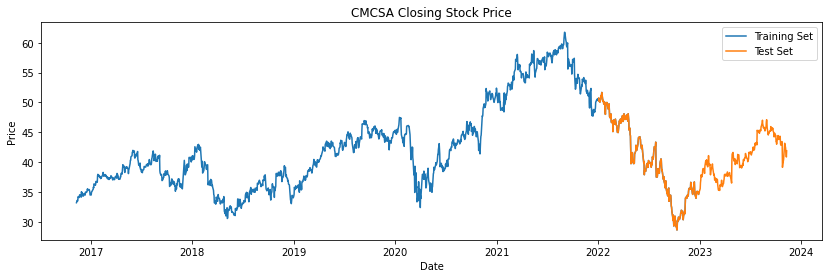

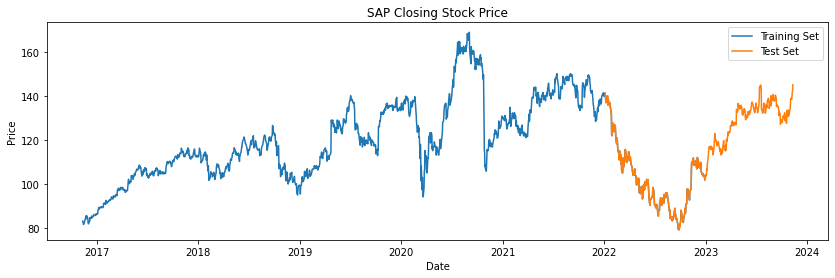

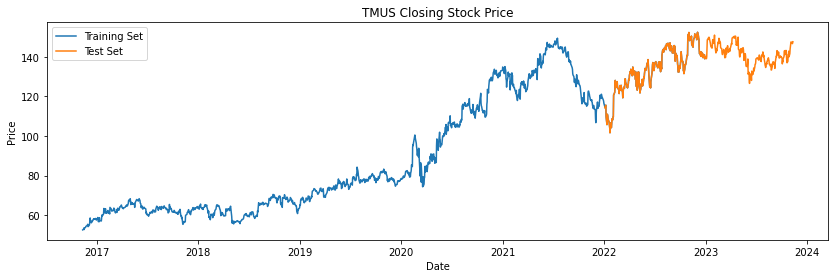

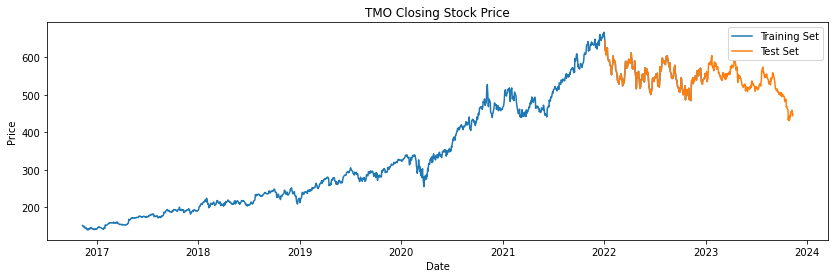

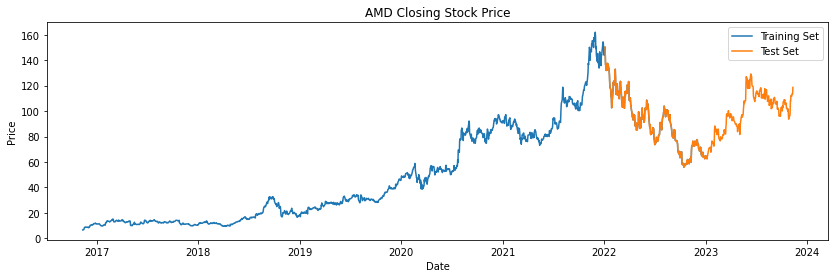

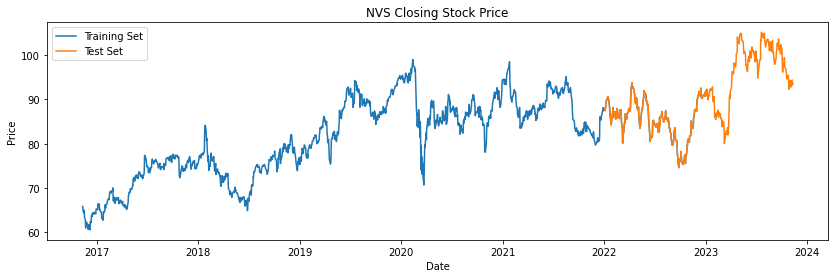

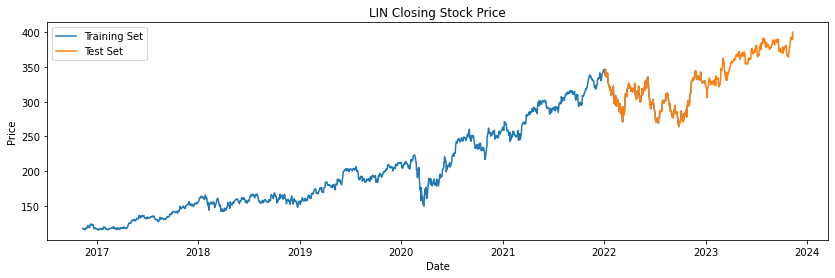

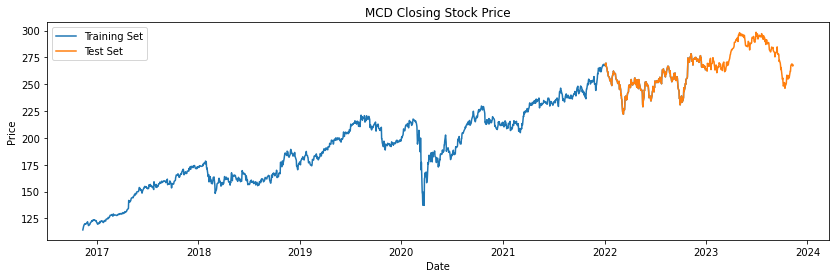

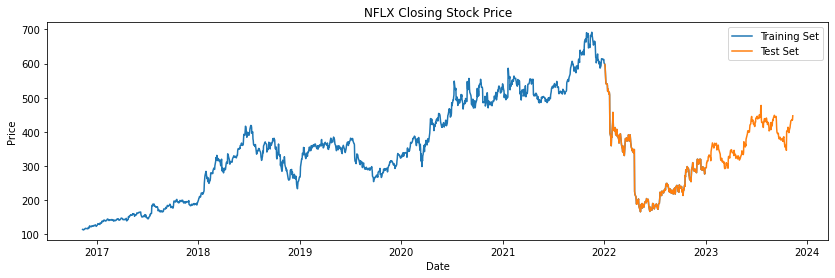

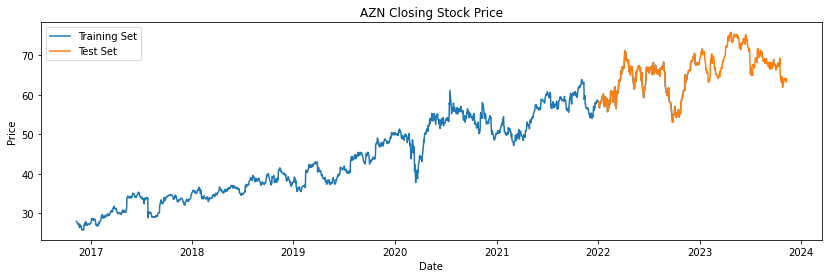

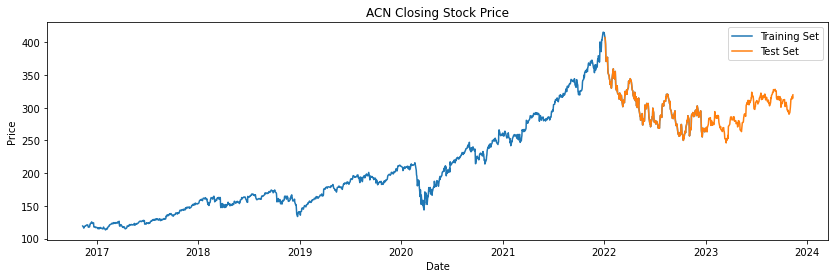

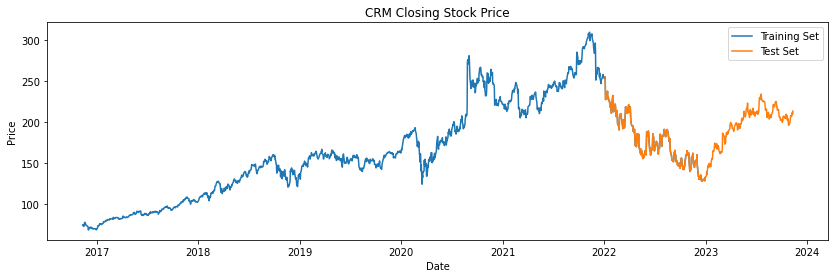

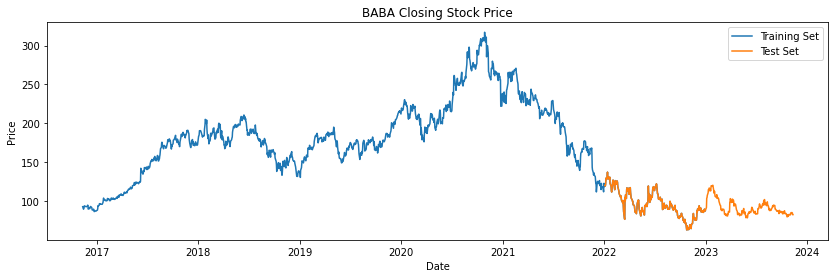

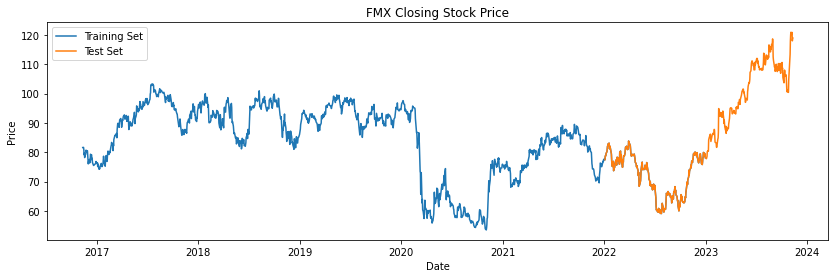

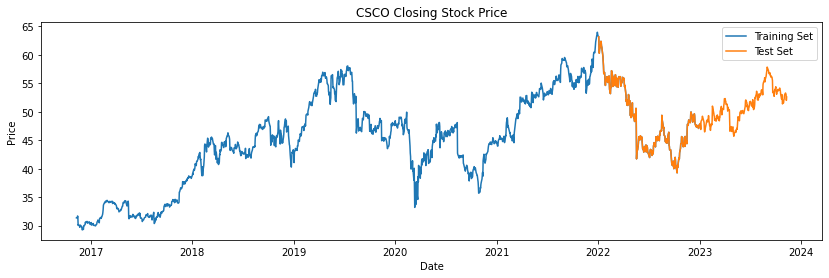

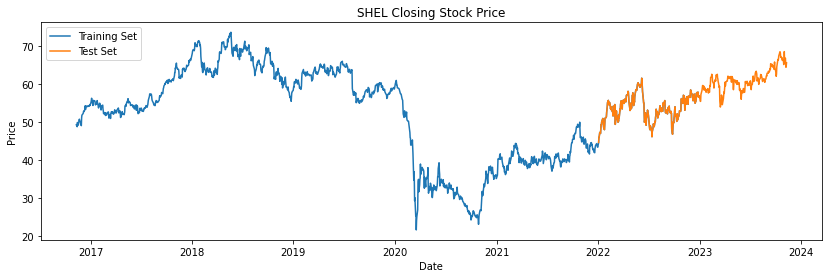

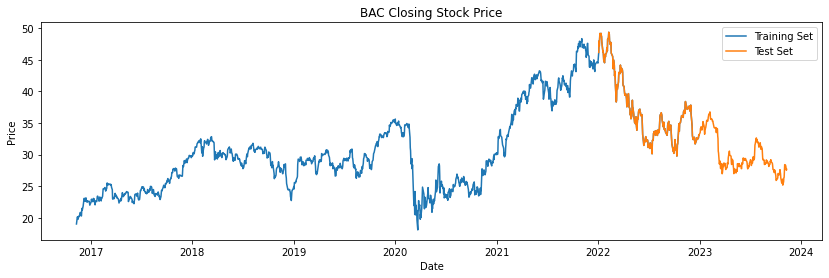

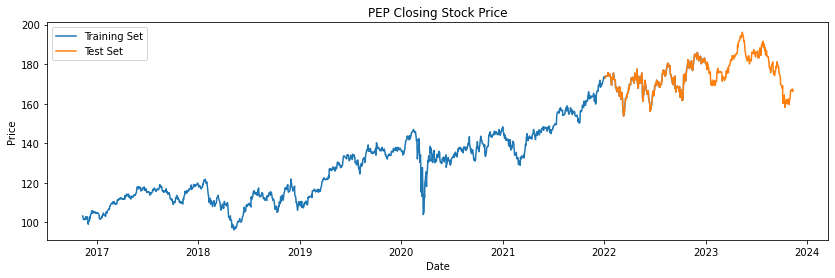

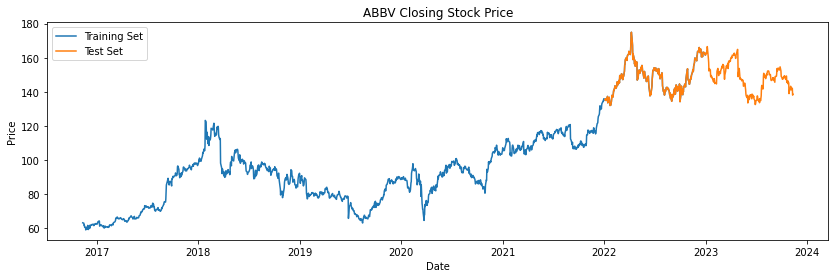

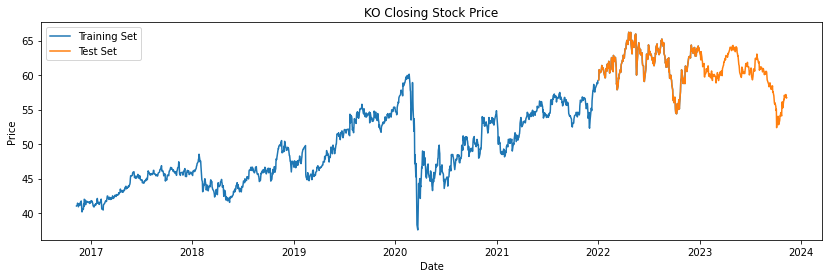

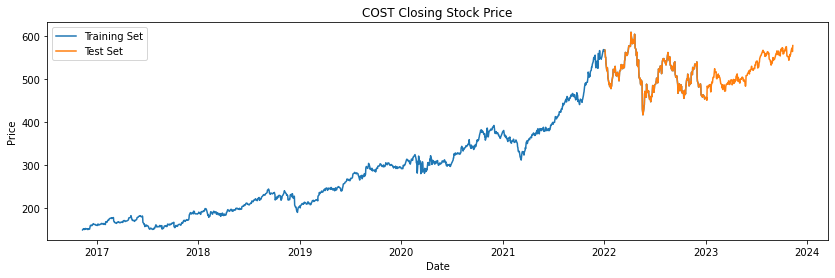

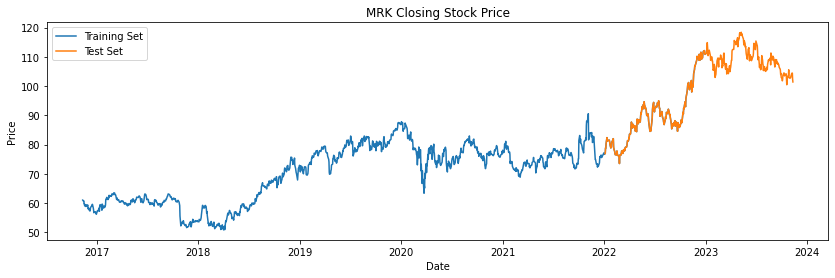

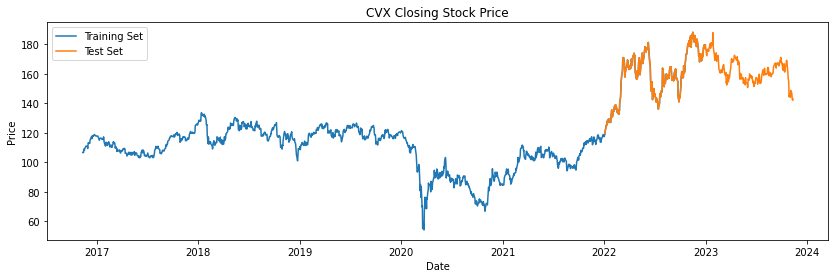

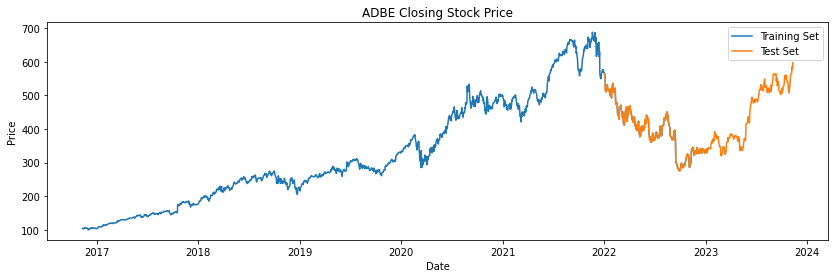

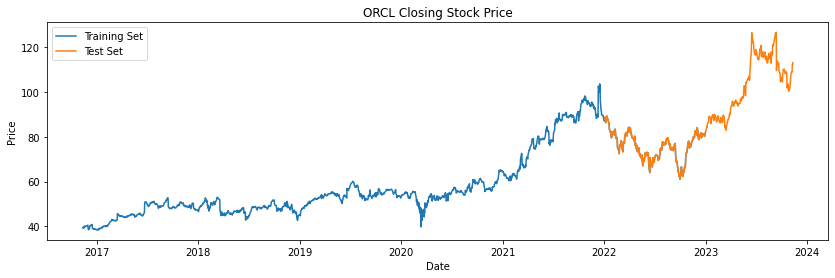

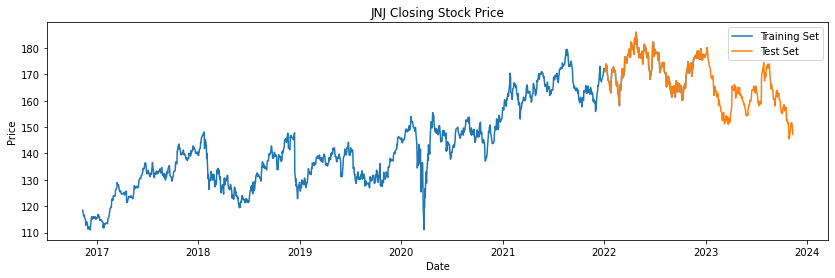

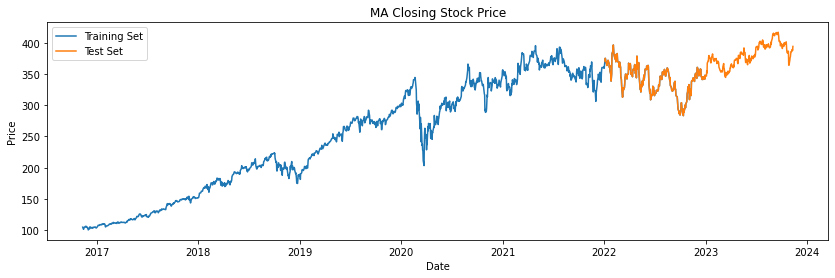

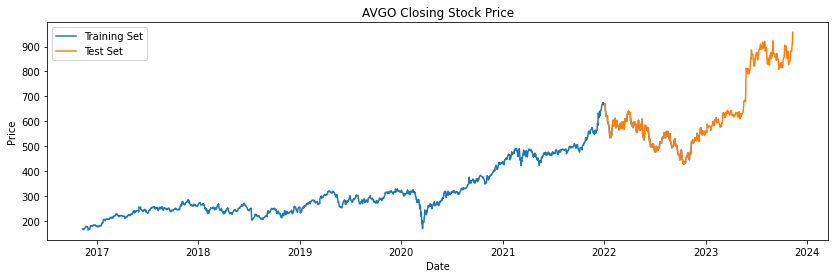

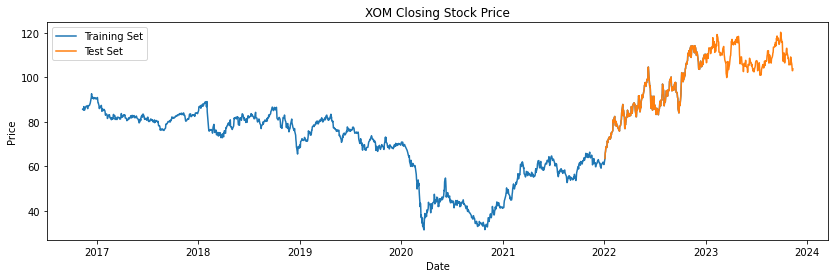

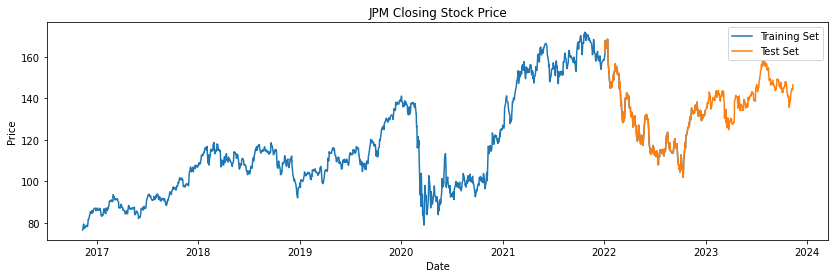

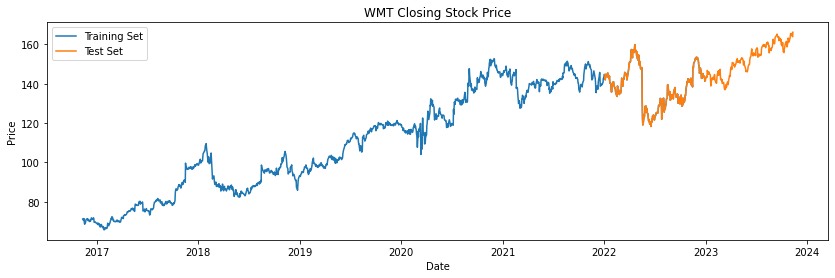

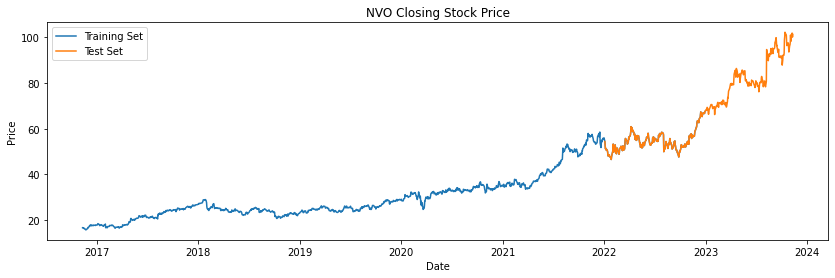

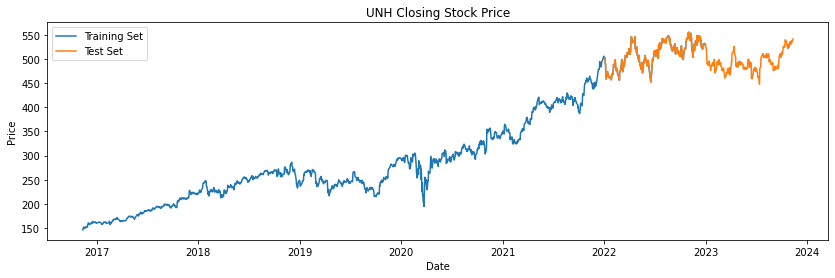

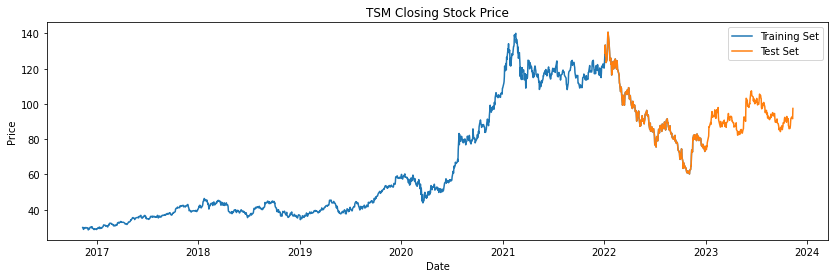

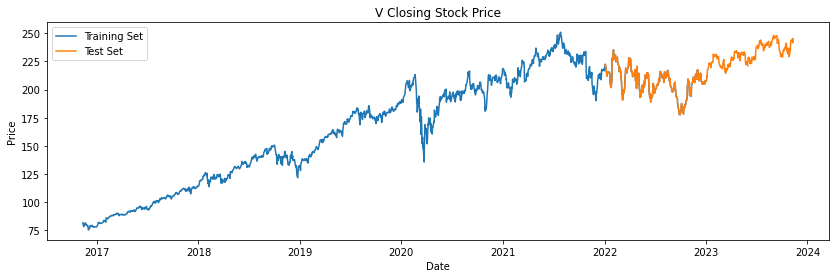

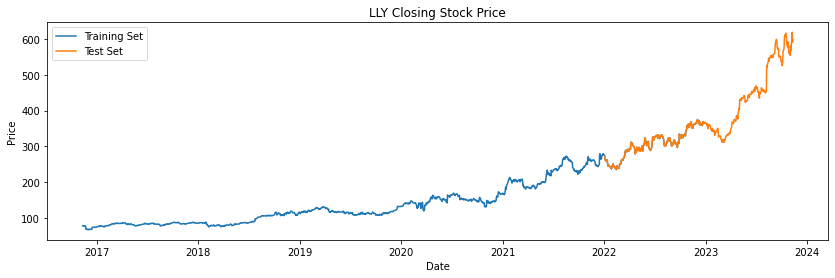

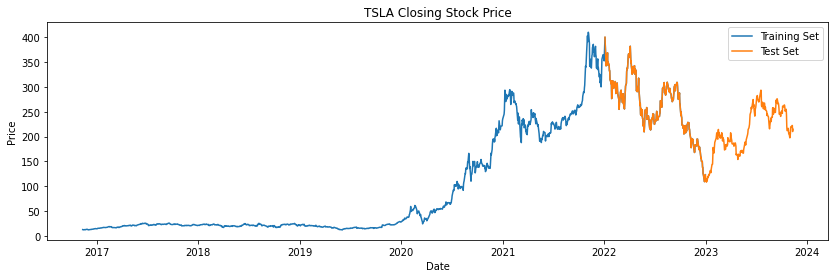

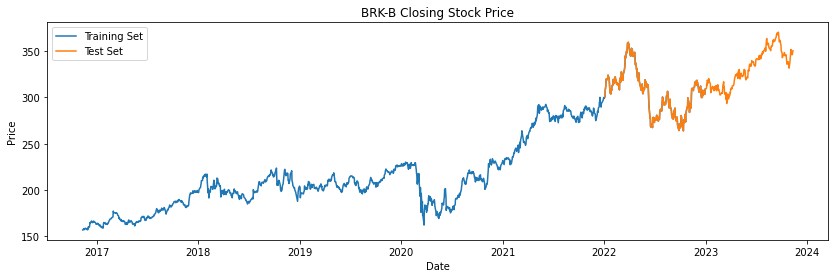

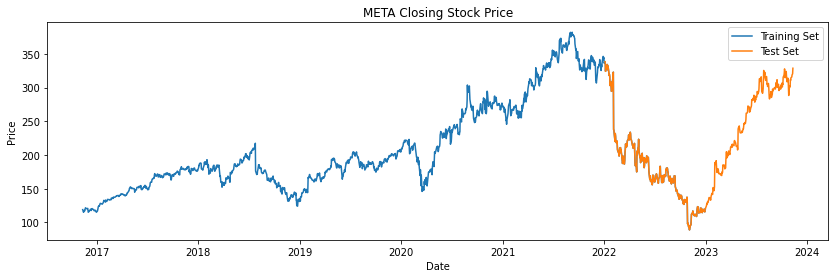

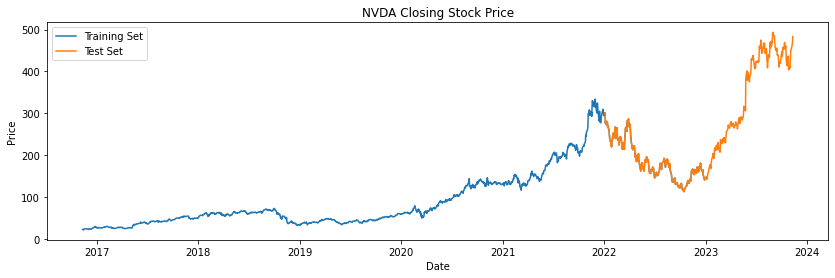

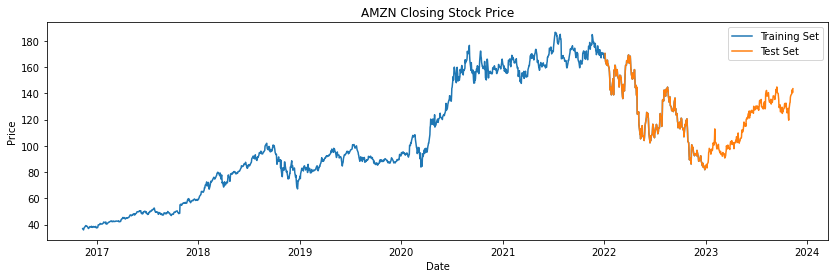

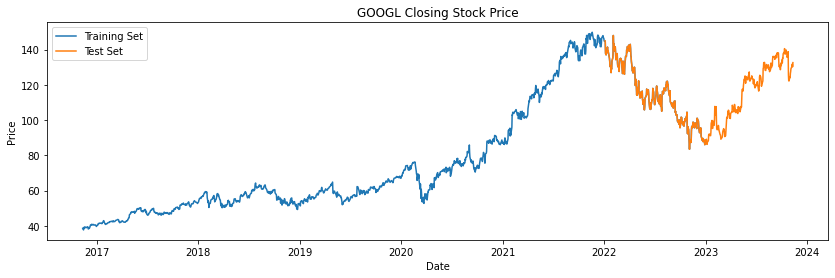

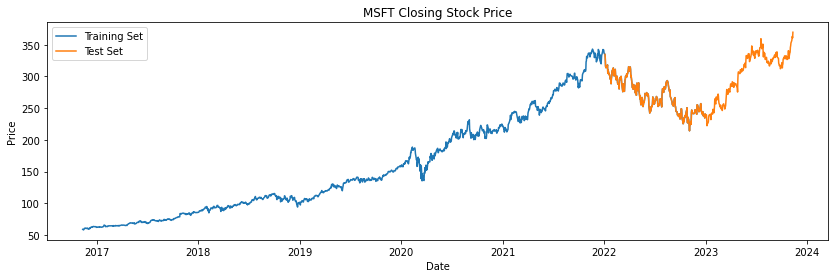

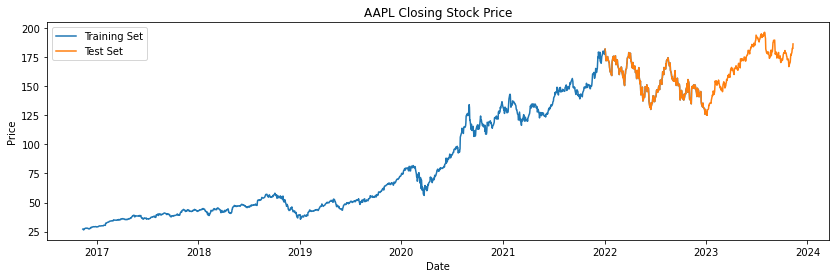

In [50]:
for i in stockList:
    plt.figure(figsize=(14,4))
    plt.plot(df_new[i]["Train"])
    plt.plot(df_new[i]["Test"])
    plt.ylabel("Price")
    plt.xlabel("Date")
    plt.legend(["Training Set", "Test Set"])
    plt.title(i + " Closing Stock Price")

In [60]:
# Scaling the training set
transform_train = {}
transform_test = {}
scaler = {}

for num, i in enumerate(stockList):
    sc = MinMaxScaler(feature_range=(0,1))
    a0 = np.array(df_new[i]["Train"])
    a1 = np.array(df_new[i]["Test"])

    #if num == 1:
        #print(a0)
    a0 = a0.reshape(a0.shape[0],1)
    a1 = a1.reshape(a1.shape[0],1)

    #if num == 1:
        #print(a0)

    transform_train[i] = sc.fit_transform(a0)
    transform_test[i] = sc.fit_transform(a1)
    scaler[i] = sc

    if num == 1:
        print(transform_train[i])



del a0
del a1

[[0.11367572]
 [0.10785334]
 [0.10369448]
 ...
 [0.69461978]
 [0.71010804]
 [0.70747797]]


In [61]:
# Extract one feature which is closing price

for i in transform_train.keys():
    print(i, transform_train[i].shape)
print("\n")    
for i in transform_test.keys():
    print(i, transform_test[i].shape)

INTC (1544, 1)
PFE (1544, 1)
CMCSA (1544, 1)
SAP (1544, 1)
TMUS (1544, 1)
TMO (1544, 1)
AMD (1544, 1)
NVS (1544, 1)
LIN (1544, 1)
MCD (1544, 1)
NFLX (1544, 1)
AZN (1544, 1)
ACN (1544, 1)
CRM (1544, 1)
BABA (1544, 1)
FMX (1544, 1)
CSCO (1544, 1)
SHEL (1544, 1)
BAC (1544, 1)
PEP (1544, 1)
ABBV (1544, 1)
KO (1544, 1)
TM (1544, 1)
COST (1544, 1)
MRK (1544, 1)
ASML (1544, 1)
CVX (1544, 1)
ADBE (1544, 1)
HD (1544, 1)
ORCL (1544, 1)
JNJ (1544, 1)
PG (1544, 1)
MA (1544, 1)
AVGO (1544, 1)
XOM (1544, 1)
JPM (1544, 1)
WMT (1544, 1)
NVO (1544, 1)
UNH (1544, 1)
TSM (1544, 1)
V (1544, 1)
LLY (1544, 1)
TSLA (1544, 1)
BRK-B (1544, 1)
META (1544, 1)
NVDA (1544, 1)
AMZN (1544, 1)
GOOGL (1544, 1)
MSFT (1544, 1)
AAPL (1544, 1)


INTC (468, 1)
PFE (468, 1)
CMCSA (468, 1)
SAP (468, 1)
TMUS (468, 1)
TMO (468, 1)
AMD (468, 1)
NVS (468, 1)
LIN (468, 1)
MCD (468, 1)
NFLX (468, 1)
AZN (468, 1)
ACN (468, 1)
CRM (468, 1)
BABA (468, 1)
FMX (468, 1)
CSCO (468, 1)
SHEL (468, 1)
BAC (468, 1)
PEP (468, 1)
ABBV (468, 1)

In [67]:
trainset = {}
testset = {}
for j in stockList:
    trainset[j] = {}
    X_train = []
    y_train = []
    for i in range(60,1544):
        X_train.append(transform_train[j][i-60:i,0]) #What is the meaning of zero
        y_train.append(transform_train[j][i,0])
    #if j == "AAPL":
            #print(y_train)
    X_train, y_train = np.array(X_train), np.array(y_train)
    '''
    if j == "AAPL":
        print(X_train)
        print(y_train)
'''
    

    trainset[j]["X"] = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1)) #Reshape from 2D to 3D by adding a dimension with 1s
    trainset[j]["y"] = y_train
    '''''
    if j == "AAPL":
        print(trainset[j]["X"])
        print(trainset[j]["y"])
        buff["X_train"] = trainset[j]["X"].shape
        print(buff["X_train"])
        '''

    
    testset[j] = {}
    X_test = []
    y_test = []    
    for i in range(60, 468):
        X_test.append(transform_test[j][i-60:i,0])
        y_test.append(transform_test[j][i,0])
    X_test, y_test = np.array(X_test), np.array(y_test)
    testset[j]["X"] = np.reshape(X_test, (X_test.shape[0], X_train.shape[1], 1))
    testset[j]["y"] = y_test


[[[0.00437067]
  [0.        ]
  [0.00224961]
  ...
  [0.03949672]
  [0.04148924]
  [0.04230874]]

 [[0.        ]
  [0.00224961]
  [0.00687738]
  ...
  [0.04148924]
  [0.04230874]
  [0.04291935]]

 [[0.00224961]
  [0.00687738]
  [0.0068131 ]
  ...
  [0.04230874]
  [0.04291935]
  [0.04243729]]

 ...

 [[0.74572976]
  [0.76919005]
  [0.77111821]
  ...
  [0.68004113]
  [0.677663  ]
  [0.66590074]]

 [[0.76919005]
  [0.77111821]
  [0.76488356]
  ...
  [0.677663  ]
  [0.66590074]
  [0.6402552 ]]

 [[0.77111821]
  [0.76488356]
  [0.73056096]
  ...
  [0.66590074]
  [0.6402552 ]
  [0.66320122]]]
[0.04291935 0.04243729 0.04431732 ... 0.6402552  0.66320122 0.66525796]
(1484, 60, 1)


In [68]:
arr_buff = []
for i in stockList:
    buff = {}
    buff["X_train"] = trainset[i]["X"].shape
    buff["y_train"] = trainset[i]["y"].shape
    buff["X_test"] = testset[i]["X"].shape
    buff["y_test"] = testset[i]["y"].shape
    arr_buff.append(buff)

pd.DataFrame(arr_buff, index=stockList)

X_train  y_train        X_test  y_test
INTC   (1484, 60, 1)  (1484,)  (408, 60, 1)  (408,)
PFE    (1484, 60, 1)  (1484,)  (408, 60, 1)  (408,)
CMCSA  (1484, 60, 1)  (1484,)  (408, 60, 1)  (408,)
SAP    (1484, 60, 1)  (1484,)  (408, 60, 1)  (408,)
TMUS   (1484, 60, 1)  (1484,)  (408, 60, 1)  (408,)
TMO    (1484, 60, 1)  (1484,)  (408, 60, 1)  (408,)
AMD    (1484, 60, 1)  (1484,)  (408, 60, 1)  (408,)
NVS    (1484, 60, 1)  (1484,)  (408, 60, 1)  (408,)
LIN    (1484, 60, 1)  (1484,)  (408, 60, 1)  (408,)
MCD    (1484, 60, 1)  (1484,)  (408, 60, 1)  (408,)
NFLX   (1484, 60, 1)  (1484,)  (408, 60, 1)  (408,)
AZN    (1484, 60, 1)  (1484,)  (408, 60, 1)  (408,)
ACN    (1484, 60, 1)  (1484,)  (408, 60, 1)  (408,)
CRM    (1484, 60, 1)  (1484,)  (408, 60, 1)  (408,)
BABA   (1484, 60, 1)  (1484,)  (408, 60, 1)  (408,)
FMX    (1484, 60, 1)  (1484,)  (408, 60, 1)  (408,)
CSCO   (1484, 60, 1)  (1484,)  (408, 60, 1)  (408,)
SHEL   (1484, 60, 1)  (1484,)  (408, 60, 1)  (408,)
BAC    (1484, 60, 1)  (1484,)  (408, 60, 1)  (408,)
PEP    (1484, 60, 1)  (1484,)  (408, 60, 1)  (408,)
ABBV   (1484, 60, 1)  (1484,)  (408, 60, 1)  (408,)
KO     (1484, 60, 1)  (1484,)  (408, 60, 1)  (408,)
TM     (1484, 60, 1)  (1484,)  (408, 60, 1)  (408,)
COST   (1484, 60, 1)  (1484,)  (408, 60, 1)  (408,)
MRK    (1484, 60, 1)  (1484,)  (408, 60, 1)  (408,)
ASML   (1484, 60, 1)  (1484,)  (408, 60, 1)  (408,)
CVX    (1484, 60, 1)  (1484,)  (408, 60, 1)  (408,)
ADBE   (1484, 60, 1)  (1484,)  (408, 60, 1)  (408,)
HD     (1484, 60, 1)  (1484,)  (408, 60, 1)  (408,)
ORCL   (1484, 60, 1)  (1484,)  (408, 60, 1)  (408,)
JNJ    (1484, 60, 1)  (1484,)  (408, 60, 1)  (408,)
PG     (1484, 60, 1)  (1484,)  (408, 60, 1)  (408,)
MA     (1484, 60, 1)  (1484,)  (408, 60, 1)  (408,)
AVGO   (1484, 60, 1)  (1484,)  (408, 60, 1)  (408,)
XOM    (1484, 60, 1)  (1484,)  (408, 60, 1)  (408,)
JPM    (1484, 60, 1)  (1484,)  (408, 60, 1)  (408,)
WMT    (1484, 60, 1)  (1484,)  (408, 60, 1)  (408,)
NVO    (1484, 60, 1)  (1484,)  (408, 60, 1)  (408,)
UNH    (1484, 60, 1)  (1484,)  (408, 60, 1)  (408,)
TSM    (1484, 60, 1)  (1484,)  (408, 60, 1)  (408,)
V      (1484, 60, 1)  (1484,)  (408, 60, 1)  (408,)
LLY    (1484, 60, 1)  (1484,)  (408, 60, 1)  (408,)
TSLA   (1484, 60, 1)  (1484,)  (408, 60, 1)  (408,)
BRK-B  (1484, 60, 1)  (1484,)  (408, 60, 1)  (408,)
META   (1484, 60, 1)  (1484,)  (408, 60, 1)  (408,)
NVDA   (1484, 60, 1)  (1484,)  (408, 60, 1)  (408,)
AMZN   (1484, 60, 1)  (1484,)  (408, 60, 1)  (408,)
GOOGL  (1484, 60, 1)  (1484,)  (408, 60, 1)  (408,)
MSFT   (1484, 60, 1)  (1484,)  (408, 60, 1)  (408,)
AAPL   (1484, 60, 1)  (1484,)  (408, 60, 1)  (408,)

In [69]:
%%time
# The LSTM architecture
regressor = Sequential()
# First LSTM layer with Dropout regularisation
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))  # search what is the input_shape?
regressor.add(Dropout(0.2))
# Second LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))    # How number of layers will matter the training result?
regressor.add(Dropout(0.2))
# Third LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.5))
# Fourth LSTM layer
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.5))
# The output layer
regressor.add(Dense(units=1))

# Compiling the RNN
regressor.compile(optimizer='rmsprop', loss='mean_squared_error')
# Fitting to the training set
for i in stockList:
    print("Fitting to", i)
    regressor.fit(trainset[i]["X"], trainset[i]["y"], epochs=10, batch_size=200)

Fitting to INTC
Epoch 1/10
8/8 [==============================] - 11s 342ms/step - loss: 0.0971
Epoch 2/10
8/8 [==============================] - 3s 336ms/step - loss: 0.0263
Epoch 3/10
8/8 [==============================] - 3s 332ms/step - loss: 0.0320
Epoch 4/10
8/8 [==============================] - 3s 384ms/step - loss: 0.0275
Epoch 5/10
8/8 [==============================] - 3s 339ms/step - loss: 0.0252
Epoch 6/10
8/8 [==============================] - 3s 345ms/step - loss: 0.0220
Epoch 7/10
8/8 [==============================] - 3s 342ms/step - loss: 0.0250
Epoch 8/10
8/8 [==============================] - 3s 339ms/step - loss: 0.0211
Epoch 9/10
8/8 [==============================] - 3s 346ms/step - loss: 0.0229
Epoch 10/10
8/8 [==============================] - 3s 343ms/step - loss: 0.0200
Fitting to PFE
Epoch 1/10
8/8 [==============================] - 3s 340ms/step - loss: 0.0089
Epoch 2/10
8/8 [==============================] - 3s 337ms/step - loss: 0.0085
Epoch 3/10
8/8 [===

 4/13 [========>.....................] - ETA: 0s

/var/folders/t8/6jkdwknn67v62v405wjsjgnm0000gn/T/ipykernel_23304/499209845.py:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(14,6))


13/13 [==============================] - 0s 19ms/step


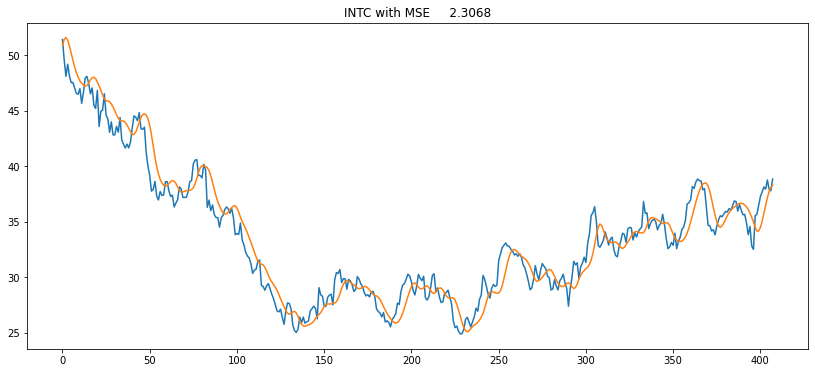

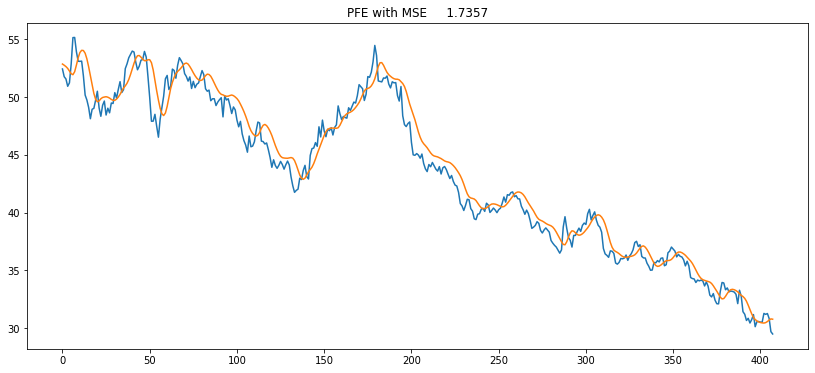

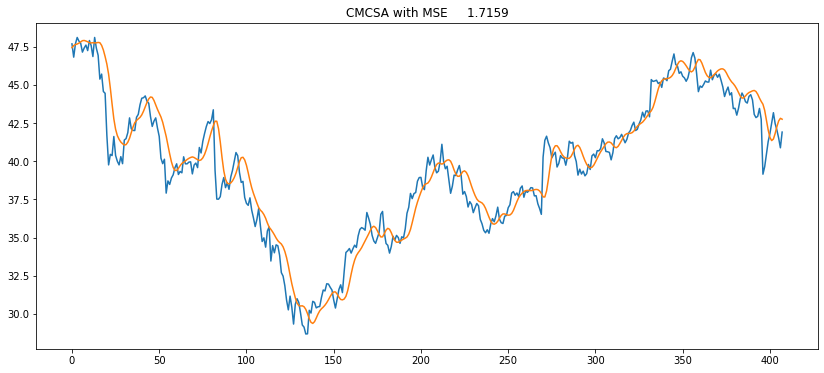

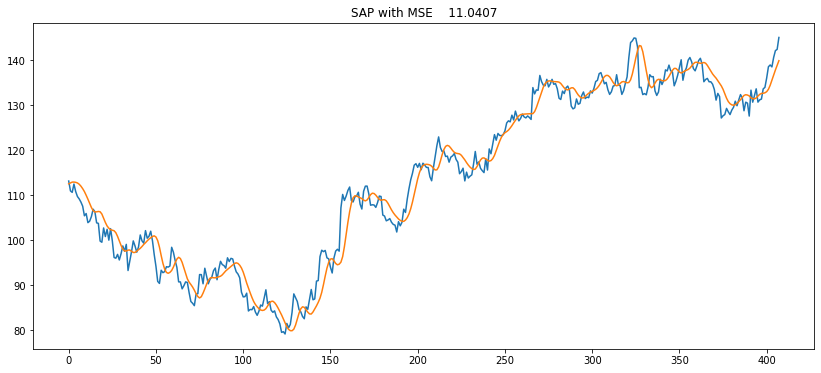

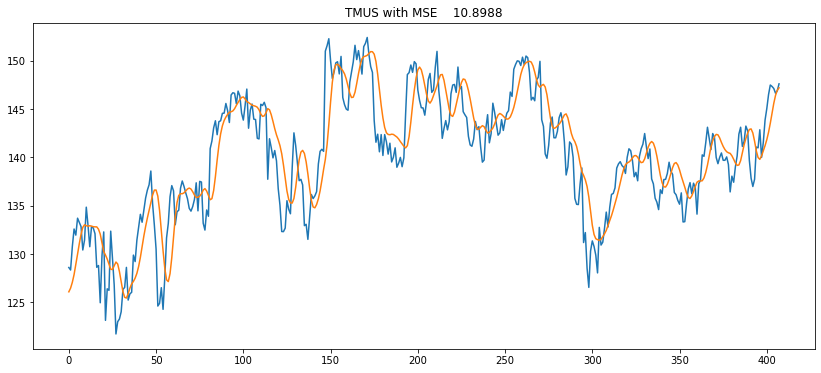

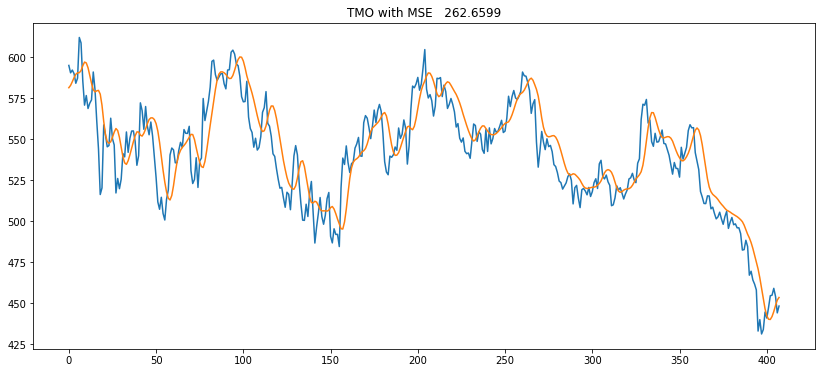

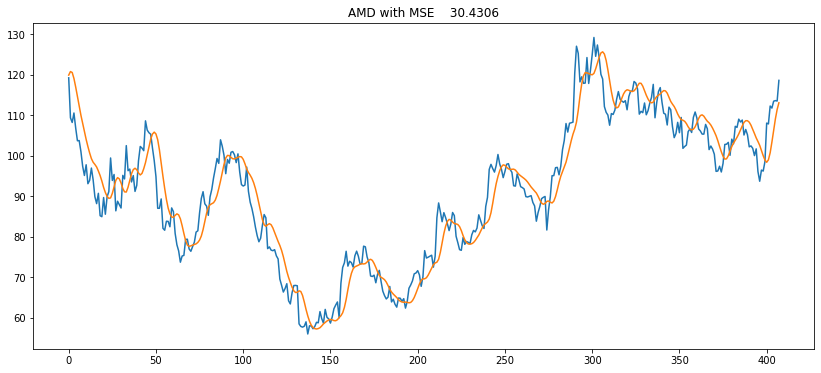

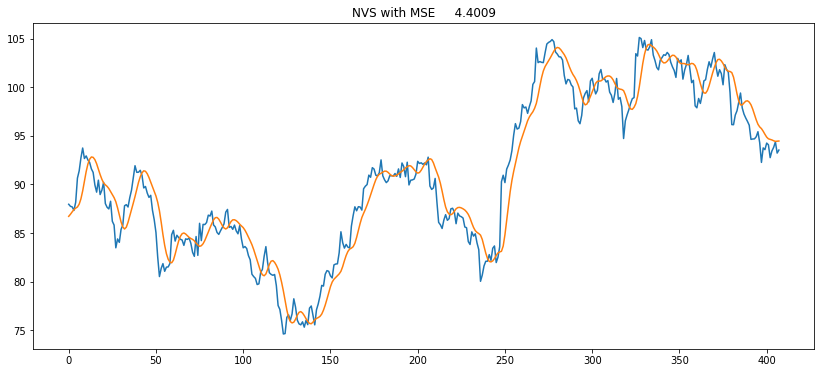

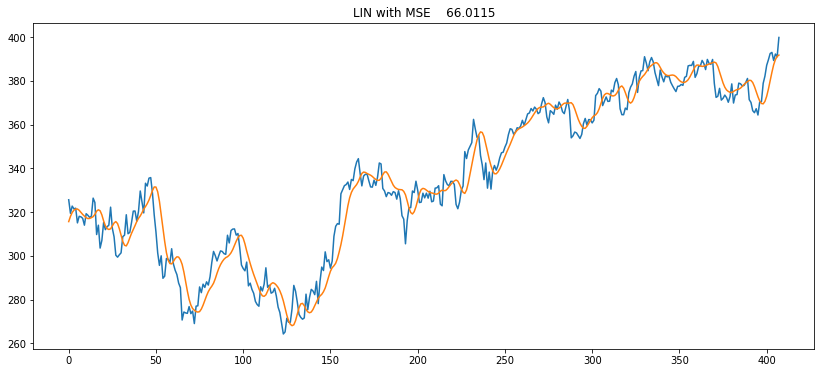

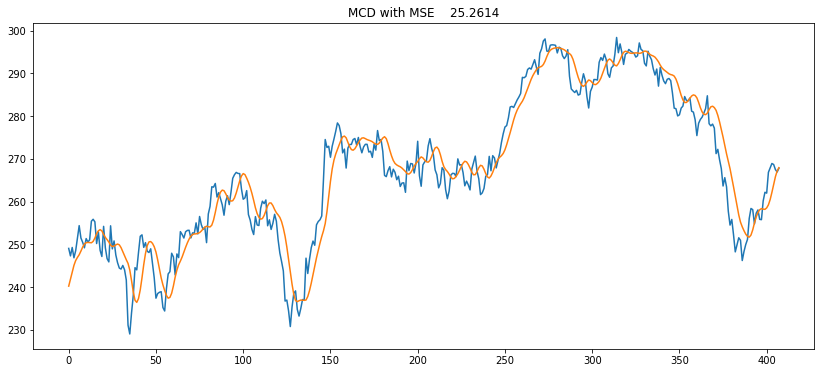

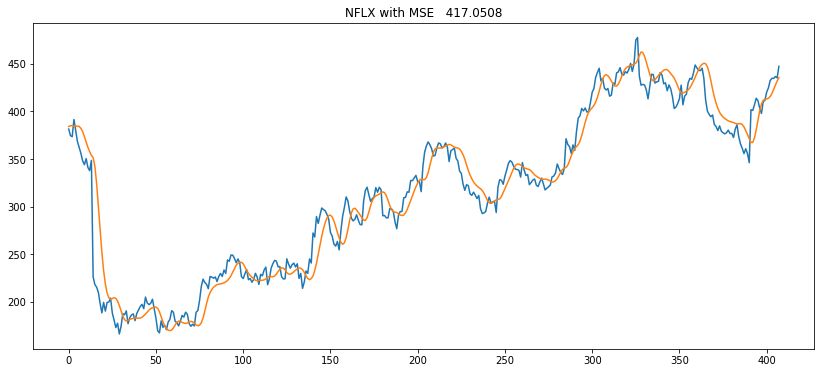

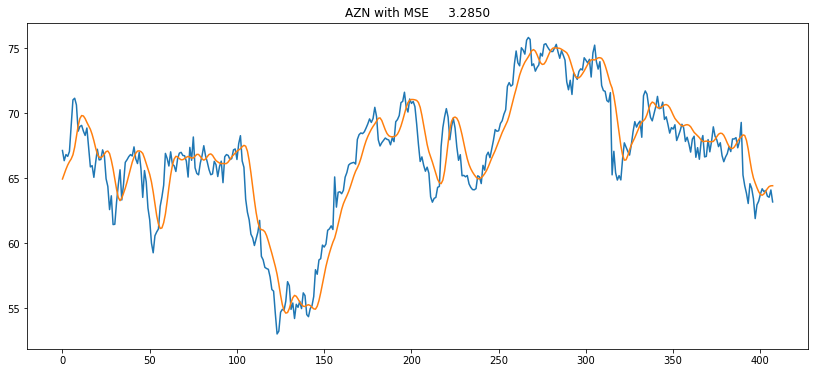

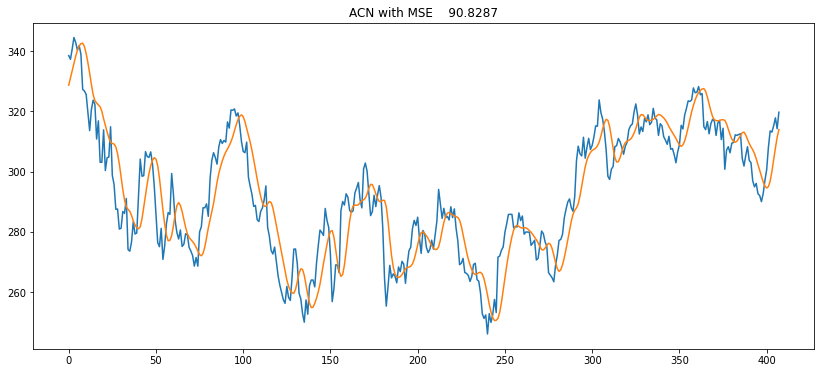

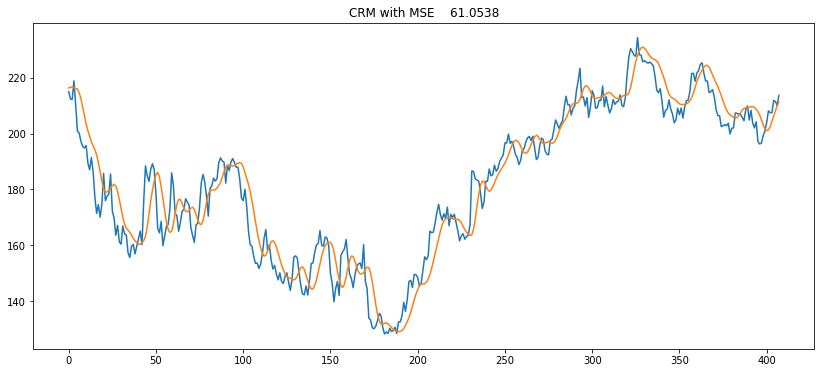

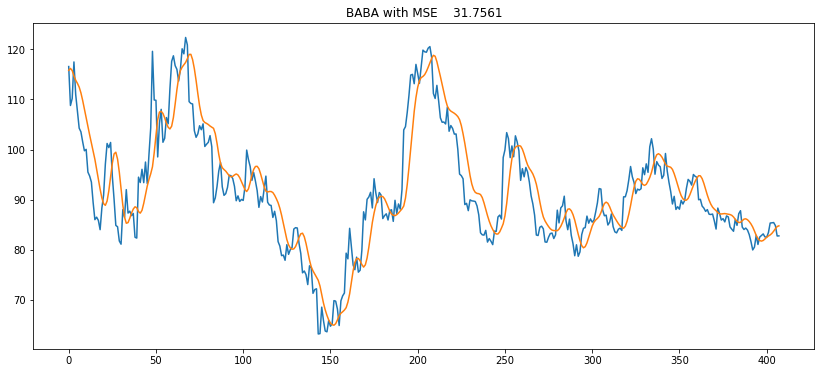

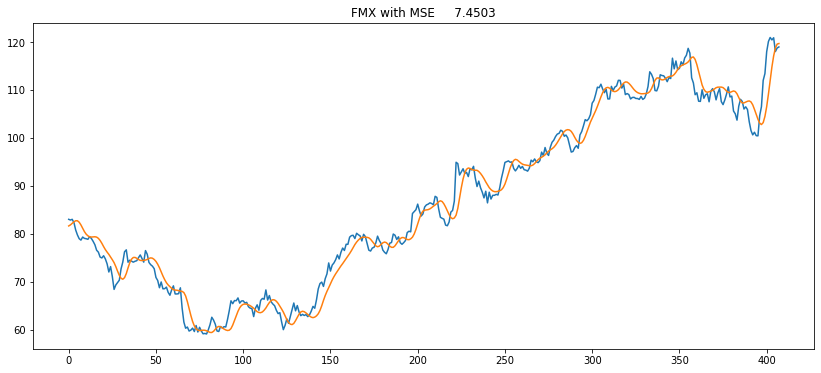

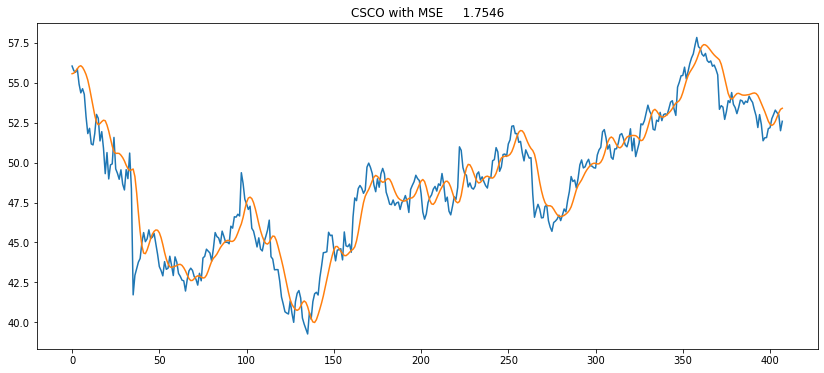

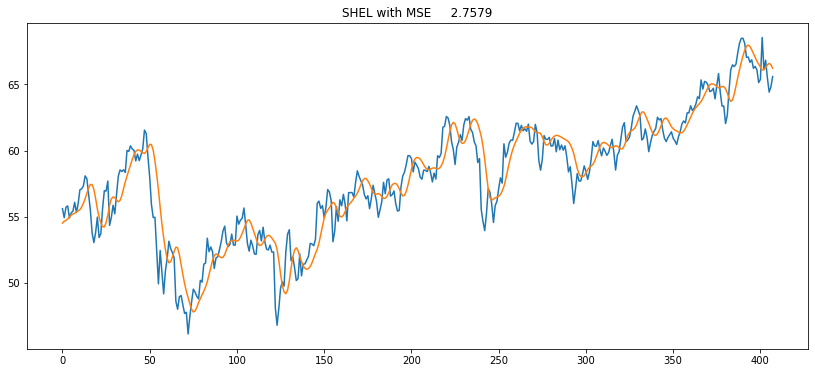

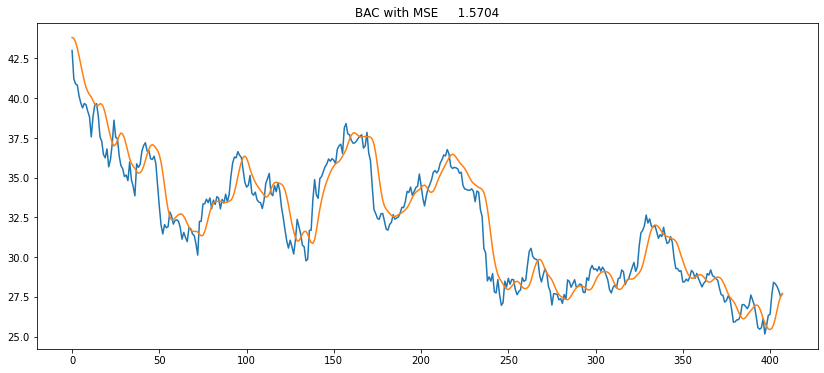

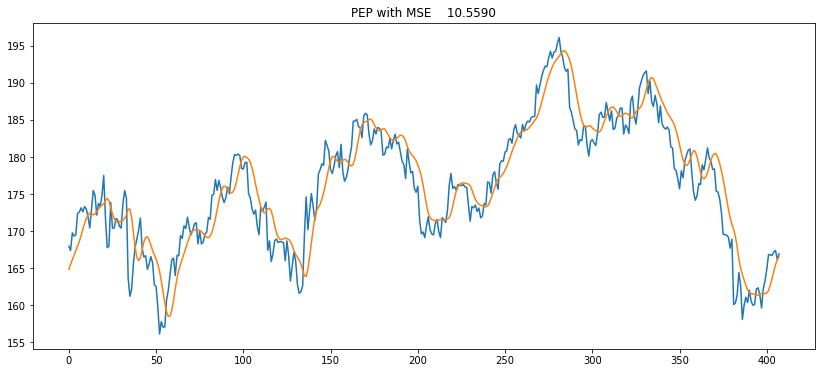

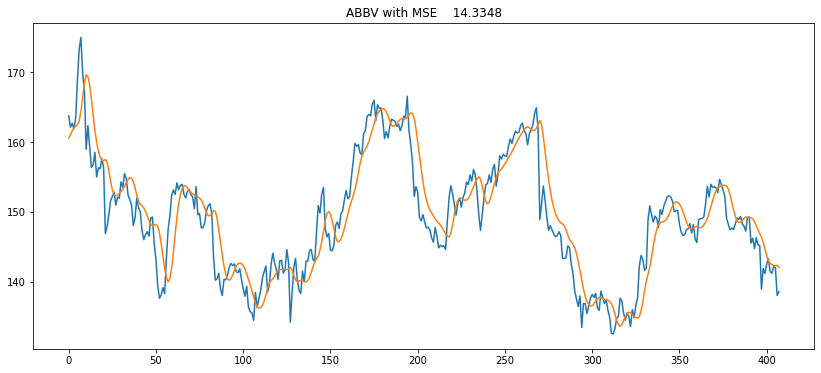

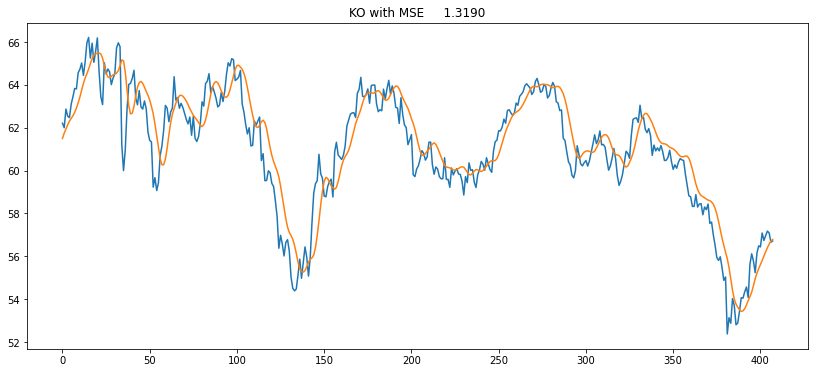

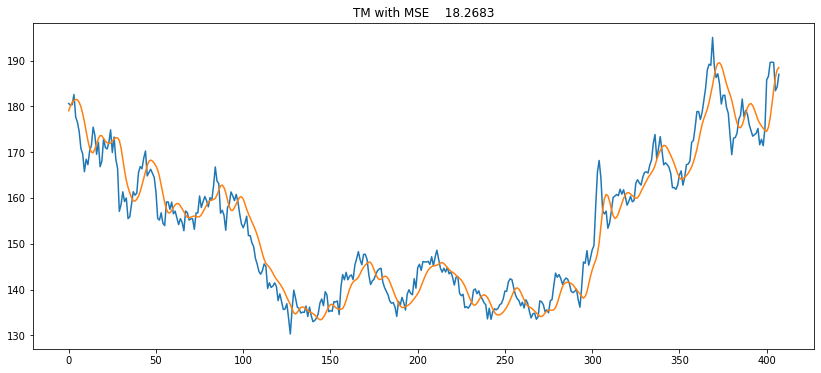

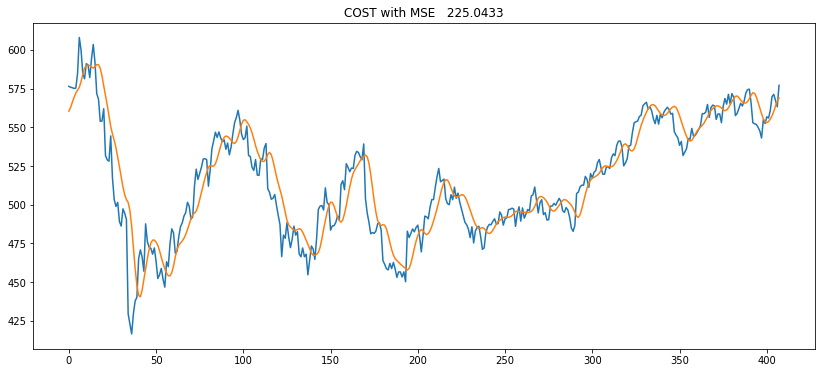

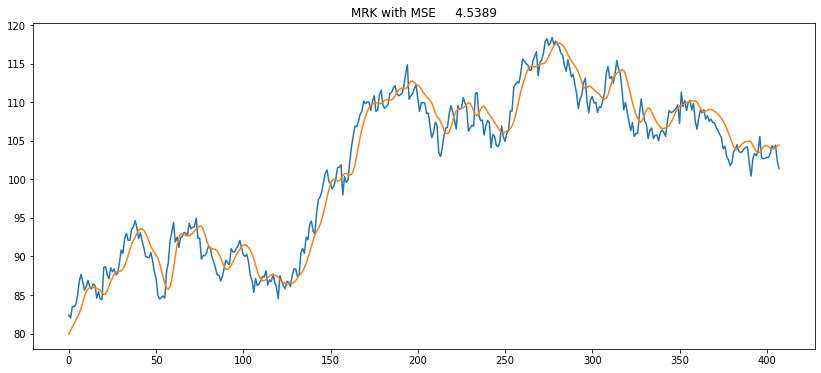

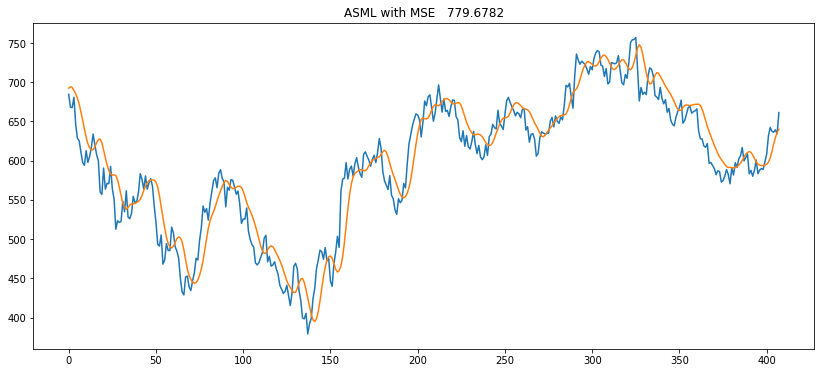

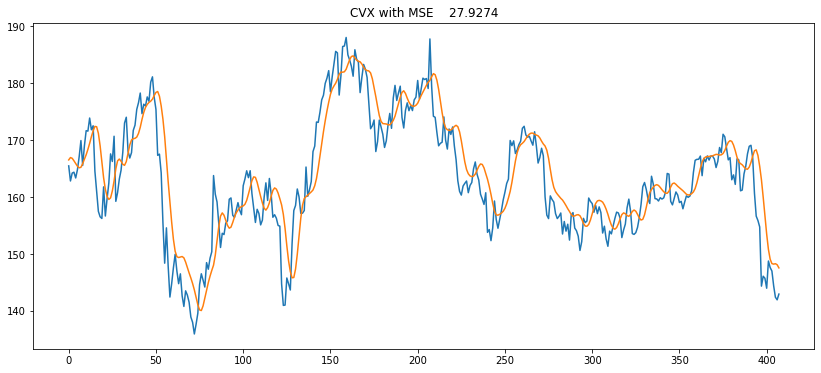

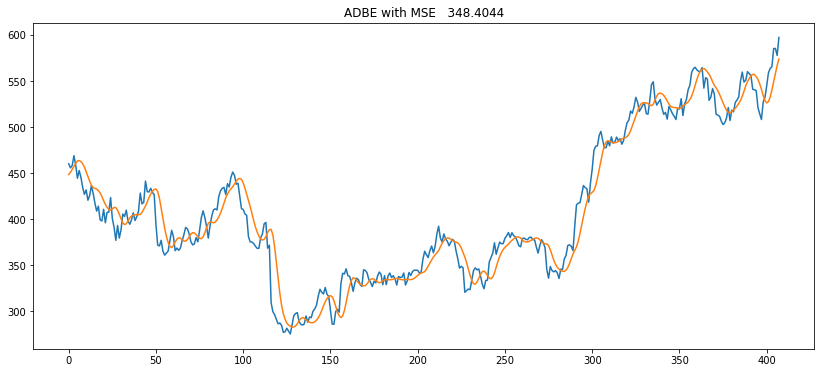

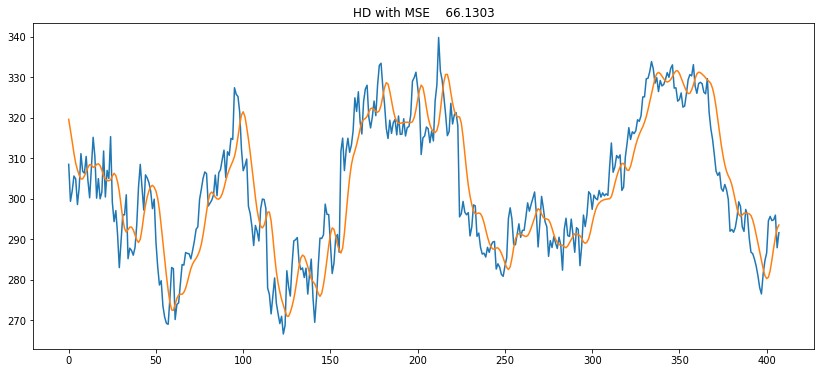

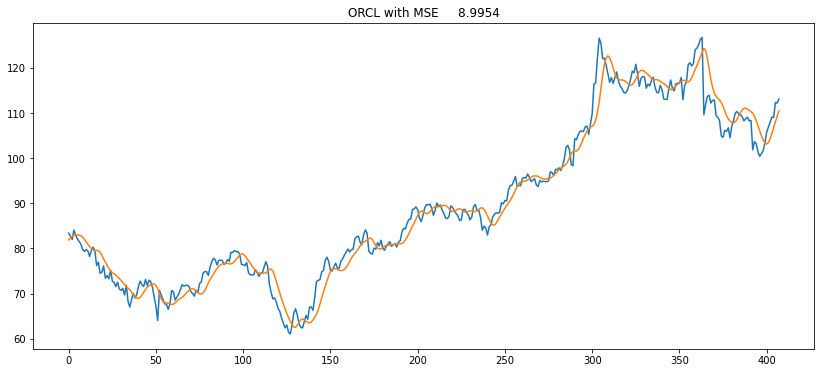

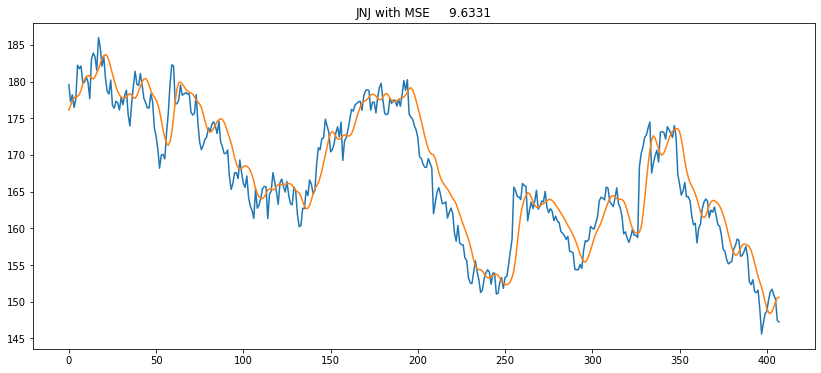

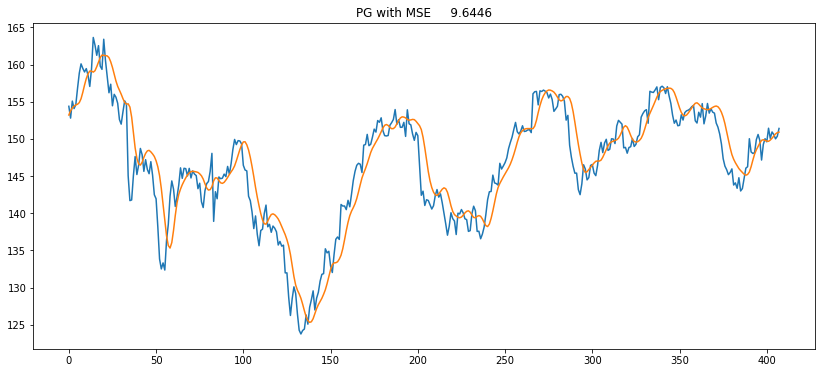

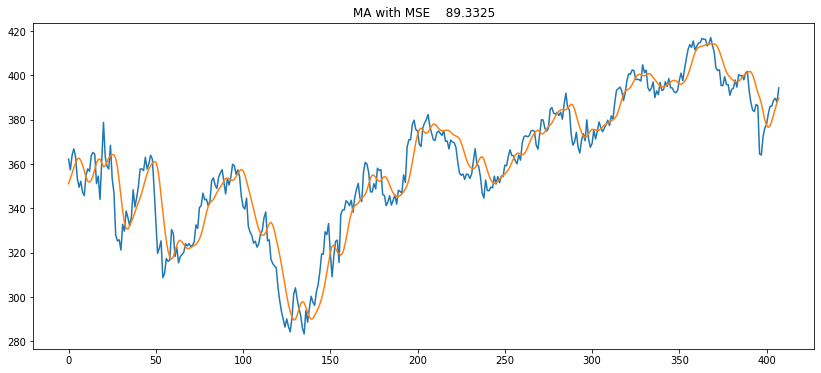

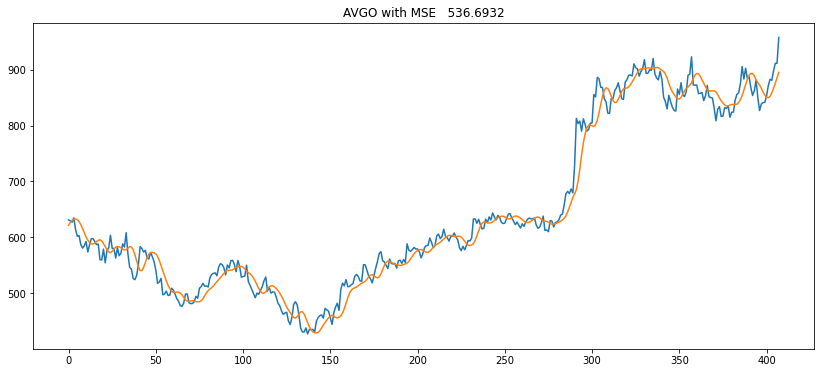

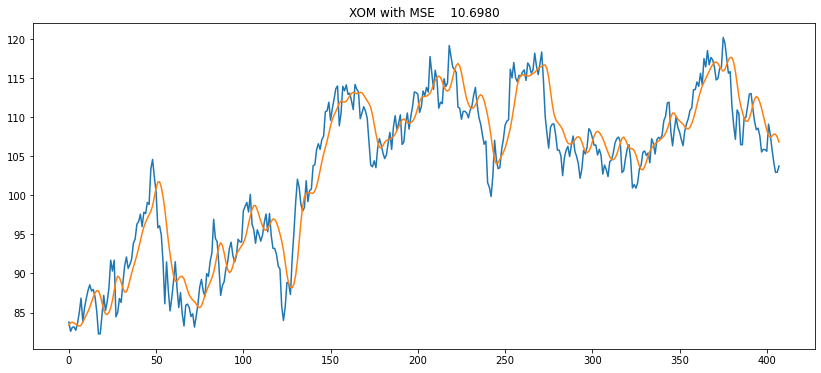

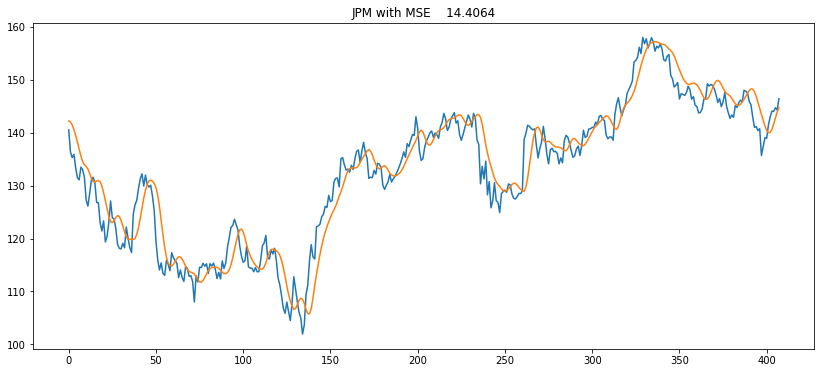

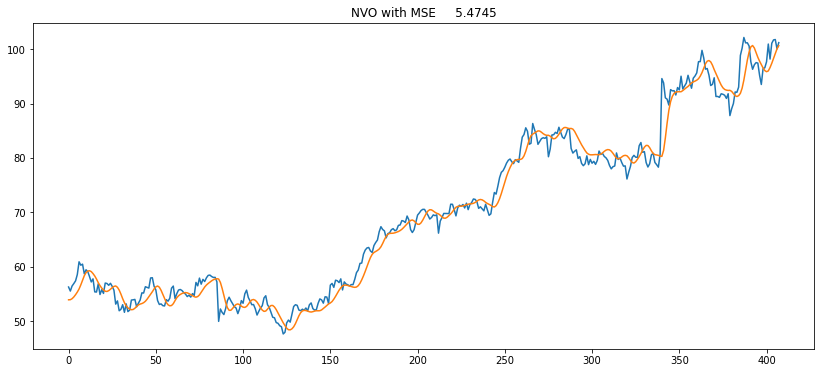

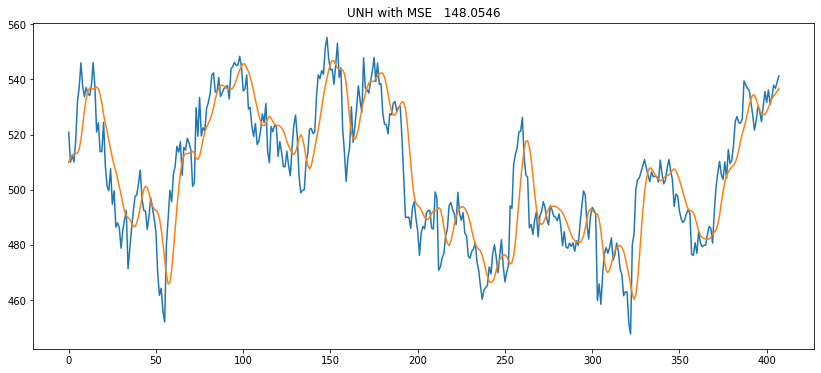

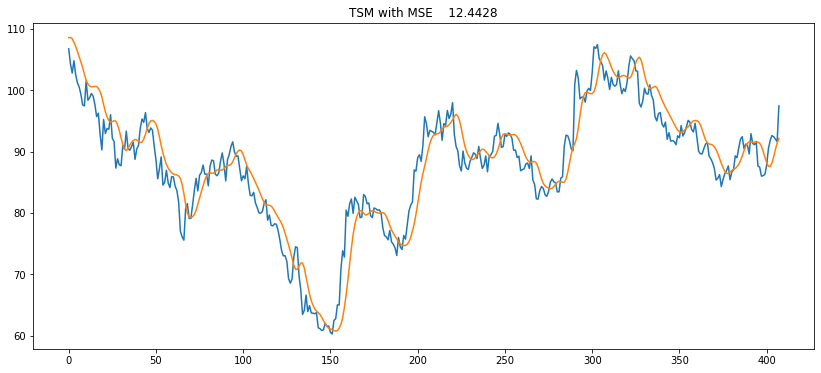

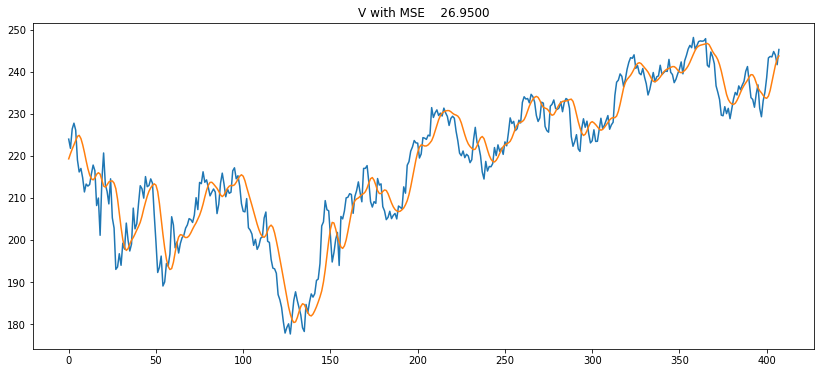

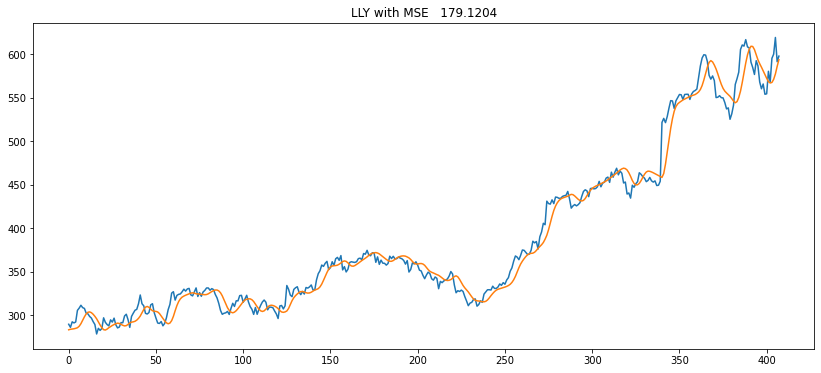

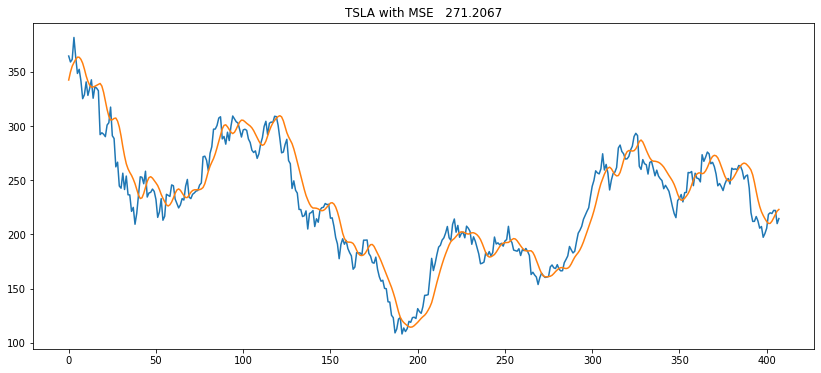

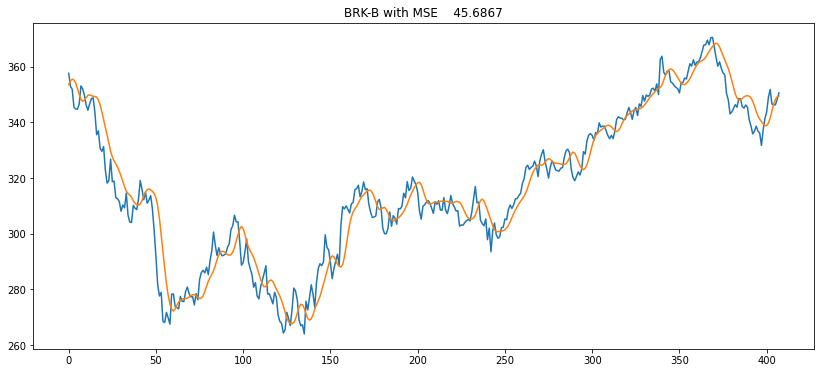

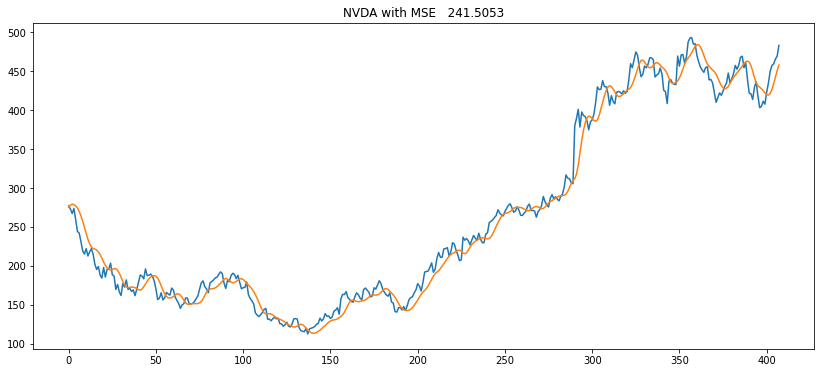

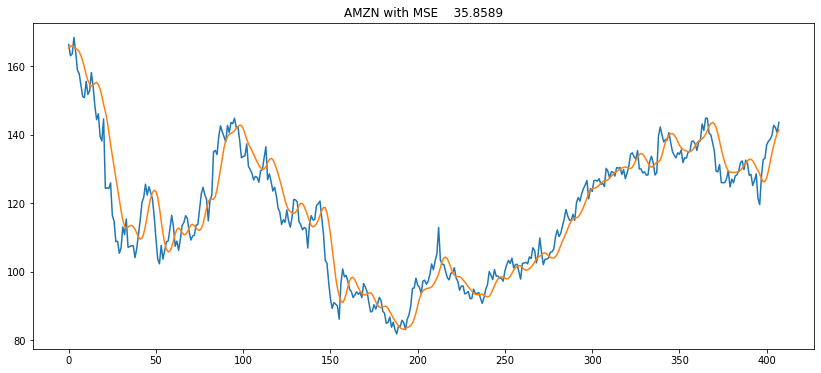

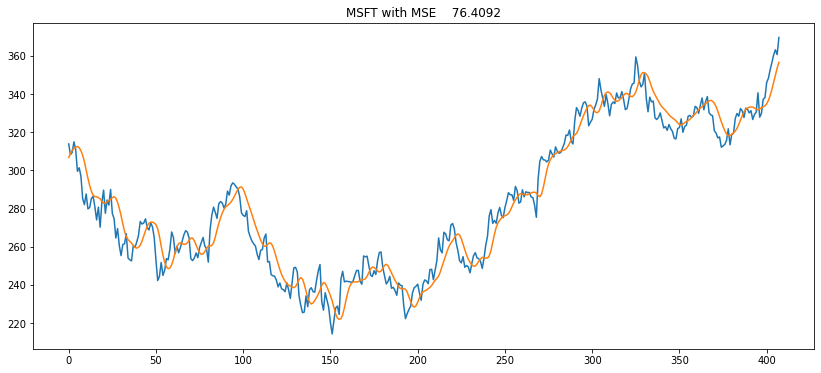

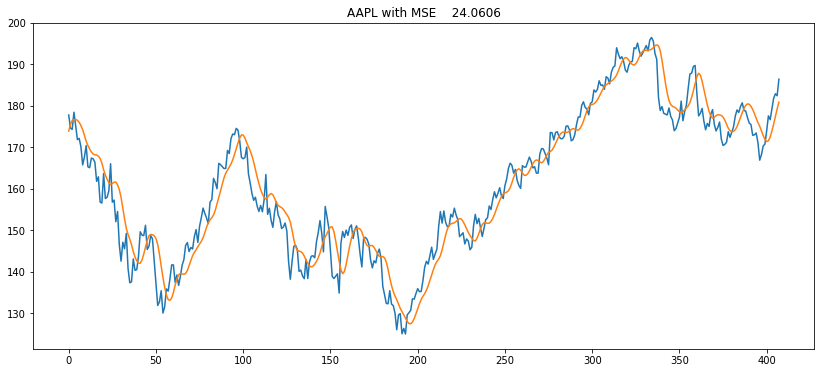

In [70]:
#We need to print the graph of loss count

pred_result = {}
for i in stockList:
    # Scale up to the orignial value
    y_true = scaler[i].inverse_transform(testset[i]["y"].reshape(-1,1))     # convert actual price into a column matrix of whatever the datatype is...
    y_pred = scaler[i].inverse_transform(regressor.predict(testset[i]["X"]))   # predict 1 price based on each set of 60 datas and save it into a column matrix

    MSE = mean_squared_error(y_true, y_pred)
    pred_result[i] = {}
    pred_result[i]["True"] = y_true    # Blue is actual
    pred_result[i]["Pred"] = y_pred    # Yellow is predicted

    # Add Legend 
    
    plt.figure(figsize=(14,6))
    plt.title("{} with MSE {:10.4f}".format(i,MSE))
    plt.plot(y_true)
    plt.plot(y_pred)